In [214]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import colorsys
from skimage.color import *
from math import ceil
import itertools


In [215]:

data = pd.DataFrame()

for el in os.listdir('data/sensor_data/'):
    temp = pd.read_csv('data/sensor_data/' + el, names=['r', 'g', 'b', 'deg'], sep=';')
    temp['file'] = np.full(len(temp), el)
    data = pd.concat([data, temp])

In [216]:
data = data.groupby(['file', 'deg'], as_index=False).mean()

In [217]:
print(data)

              file   deg         r         g         b
0       black1.csv     0  0.000000  0.473978  0.833333
1       black1.csv     1  0.000000  0.236989  0.833333
2       black1.csv     2  0.000000  0.710967  0.833333
3       black1.csv     3  0.000000  1.263940  0.833333
4       black1.csv     4  0.000000  1.895911  1.111111
...            ...   ...       ...       ...       ...
30518  yellow3.csv  1741  0.443864  0.494186  2.054381
30519  yellow3.csv  1742  0.665796  0.494186  1.155590
30520  yellow3.csv  1743  0.000000  0.164729  1.540786
30521  yellow3.csv  1744  0.000000  0.329457  1.283988
30522  yellow3.csv  1745  0.000000  0.494186  1.540786

[30523 rows x 5 columns]


In [218]:
data = data[data['deg'] > 150]

In [219]:
data['sum'] = data['r'] + data['g'] + data['b']
data['sum'] = list(map(np.sum, list(np.array(data[['r', 'g', 'b']]))))

# data['y'], data['u'], data['v'] = np.array(list(map(rgb2yuv, np.array([data['r'], data['g'], data['b']]).reshape(len(data), 3)))).reshape(3, len(data))
data['r_m'] = data['r'] / data['sum']
data['g_m'] = data['g'] / data['sum']
data['b_m'] = data['b'] / data['sum']

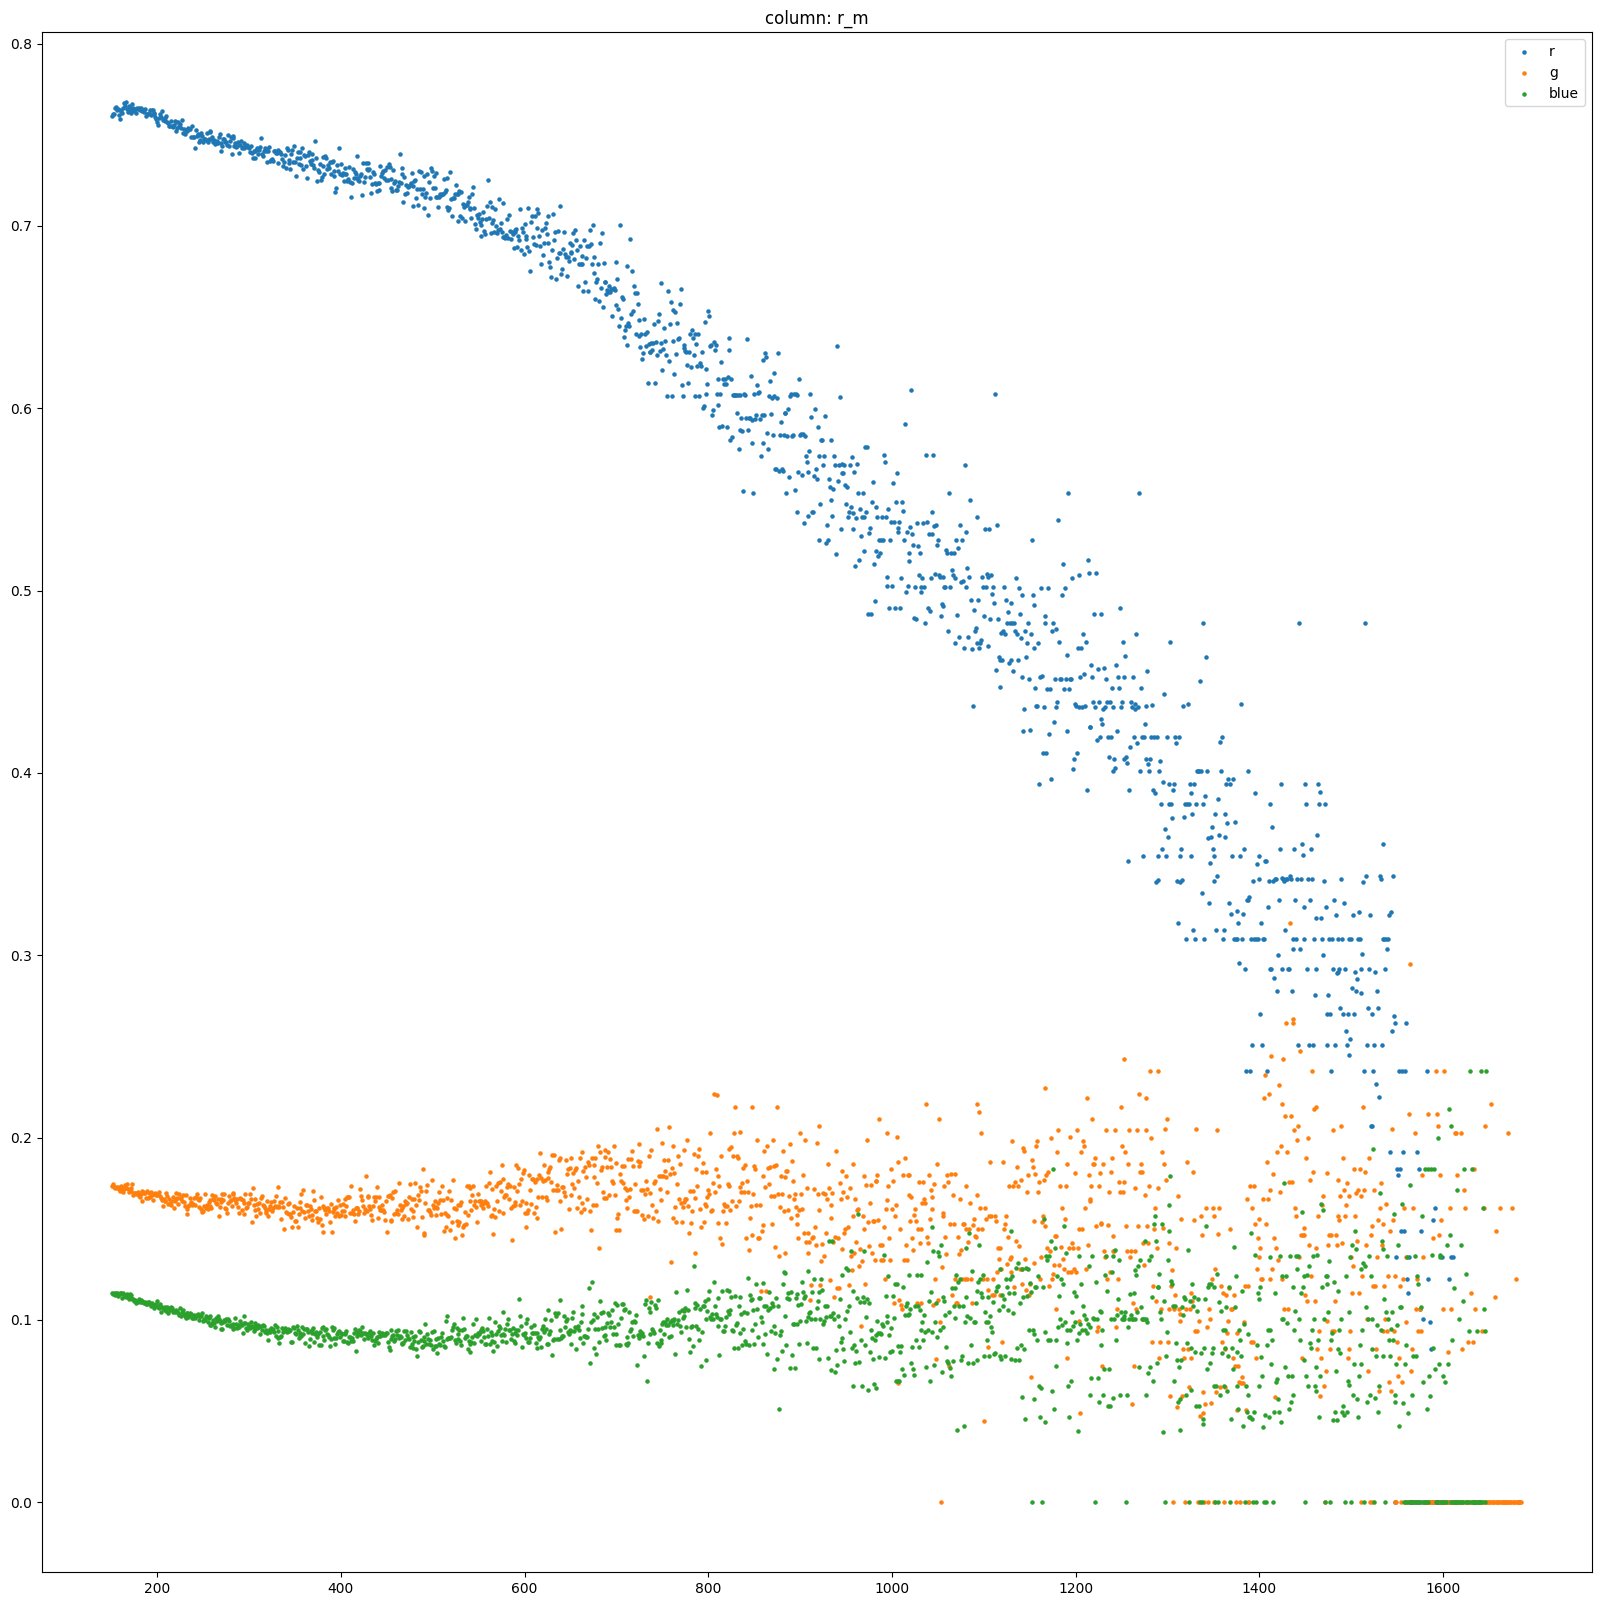

In [220]:
part1 = data[data['file'] == 'white1.csv']
part2 = data[data['file'] == 'black1.csv']
part3 = data[data['file'] == 'red1.csv']
part4 = data[data['file'] == 'green1.csv']
part5 = data[data['file'] == 'blue1.csv']

column = 'r_m'

fig, ax = plt.subplots(figsize=(20, 20))
# ax.scatter(part1['deg'], part1[column], s=5, label='w')
# ax.scatter(part2['deg'], part2[column], s=5, label='black')
ax.scatter(part3['deg'], part3[column], s=5, label='r')
ax.scatter(part4['deg'], part4[column], s=5, label='g')
ax.scatter(part5['deg'], part5[column], s=5, label='blue')
ax.set_title(f'column: {column}')
ax.legend()

In [221]:

samples = {
    's_r': (1, 0, 0),
's_g': (0, 1, 0),
's_blue': (0, 0, 1),
's_w': (1 / 3, 1 / 3, 1 / 3),
's_black': (0, 0, 0),
's_yellow': (1 / 2, 1 / 2, 0)
}

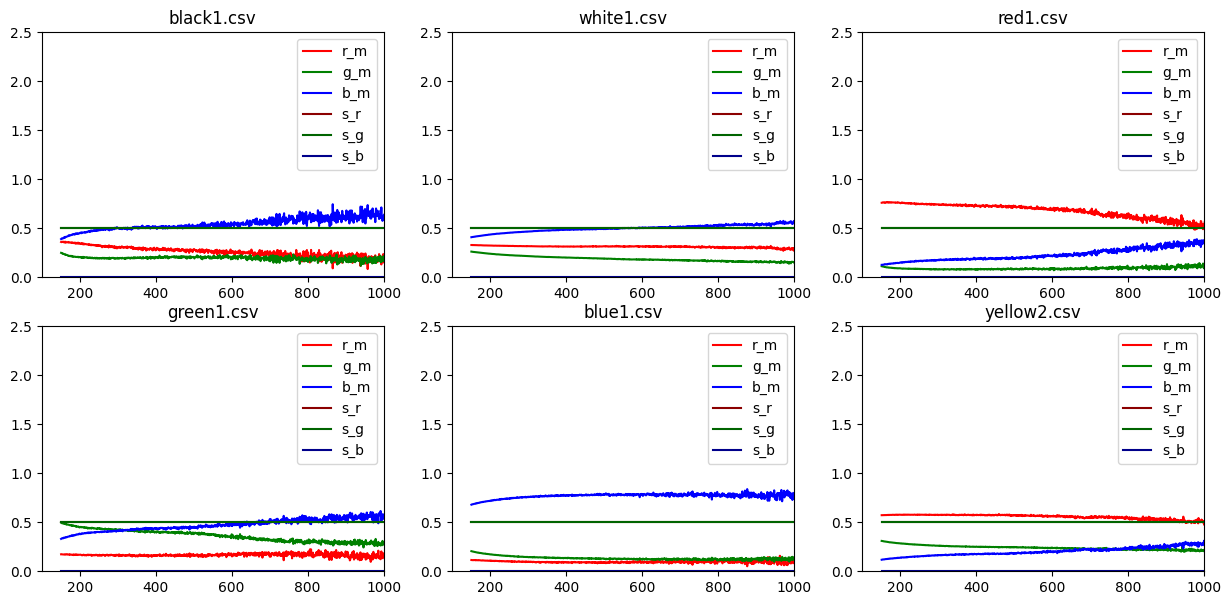

In [233]:
files = ['black1.csv', 'white1.csv', 'red1.csv', 'green1.csv', 'blue1.csv', 'yellow2.csv']

fig, axes = plt.subplots(ceil(len(files) // 3), 3, figsize=(15, 7))

border_x = [100, 1000]
border_y = [0, 2.5]
show_sample = 's_yellow'

for ax, file in zip(list(itertools.chain(*list(axes))), files):
    temp = data[data['file'] == file]
    ax.plot(temp['deg'], temp['r_m'], label='r_m', color='red')
    ax.plot(temp['deg'], temp['g_m'], label='g_m', color='green')
    ax.plot(temp['deg'], temp['b_m'], label='b_m', color='blue')
    ax.plot(temp['deg'], np.full(len(temp['deg']), samples[show_sample][0]), label='s_r', color='darkred')
    ax.plot(temp['deg'], np.full(len(temp['deg']), samples[show_sample][1]), label='s_g', color='darkgreen')
    ax.plot(temp['deg'], np.full(len(temp['deg']), samples[show_sample][2]), label='s_b', color='darkblue')
    ax.set_xlim(border_x)
    ax.set_ylim(border_y)
    ax.set_title(file)
    ax.legend()

In [234]:
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)